In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
def replace_zeros(df, column):
    df[column] = np.where(df[column] == 0, df[column].median(), df[column])

In [7]:
test_df = df.copy()
test_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
lista = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

for col in lista:
    replace_zeros(test_df, col)

In [9]:
test_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split

X = test_df.drop("Outcome", axis=1)
y = test_df["Outcome"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train, y_train)

pred = rf_classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[93 14]
 [18 29]]
0.7922077922077922
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



# Random Search CV

Procura Random e por isso é maia rápido, melhor para quando temos muitas features

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees
n_estimatores = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

#number of features to consider in every split
max_features = ["auto", "sqrt", "log2"]

#max number od level in the tree
max_dept = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

#min number of samples required to split a node
min_samples_split = [1, 3, 4, 5, 7, 9, 10, 14]

#min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

#Random Grid
random_grid = {
    "n_estimators":n_estimatores,
    "max_features":max_features,
    "max_depth":max_dept,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "criterion":["entropy", "gini"]
}

In [14]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)

In [15]:
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9,
                                                              10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
              

In [16]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 560,
 'criterion': 'gini'}

In [15]:
best_rf = RandomForestClassifier(max_depth=560, max_features='auto', min_samples_leaf=1,
                       min_samples_split=10, n_estimators=1800, criterion="gini")

In [16]:
best_rf.fit(X_train, y_train)

pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[95 12]
 [14 33]]
0.8311688311688312
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       107
           1       0.73      0.70      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



# Grid Search CV 

In [17]:
grid_parms = {'criterion': ["gini"],
              'max_depth': [560],
              'max_features': ["auto"],
              'min_samples_leaf': [1, 2, 3, 4],
              'min_samples_split': [8, 9, 10, 11, 12],
              'n_estimators': [1700, 1800, 1900]
}

In [18]:
#### Fit the grid_search to the data
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=grid_parms, cv=10, n_jobs=-1, verbose=2)

grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [560],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1700, 1800, 1900]},
             verbose=2)

In [19]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 560,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 1900}

In [18]:
best_rf = RandomForestClassifier(max_depth=560, max_features='auto', min_samples_leaf=2,
                       min_samples_split=9, n_estimators=1900, criterion="gini")

best_rf.fit(X_train, y_train)

pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[96 11]
 [15 32]]
0.8311688311688312
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



# Bayesian Optimization

In [19]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [20]:
space = {
    'criterion': hp.choice('criterion', ['entropy', 'gini']),
    'max_depth': hp.quniform('max_depth', 10, 1200, 10),
    'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
    'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
    'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
}

In [21]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x222e8cb3610>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x222e8cb3160>,
 'max_features': <hyperopt.pyll.base.Apply at 0x222e8cb3040>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x222e8ca7cd0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x222e8ca7e50>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x222e8ca7b80>}

In [22]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [24]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [02:39<00:00,  2.00s/trial, best loss: -0.7671864587498335]


{'criterion': 1,
 'max_depth': 620.0,
 'max_features': 2,
 'min_samples_leaf': 0.0029327474749909765,
 'min_samples_split': 0.11064421683172612,
 'n_estimators': 1}

In [25]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0:10, 1:50, 2:300, 3:750, 4:1200, 5:1300, 6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
log2
50


In [26]:
best['min_samples_leaf']

0.0029327474749909765

In [28]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[96 11]
 [22 25]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.69      0.53      0.60        47

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



# Genetic Algorithms

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(params)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations=5, population_size=24,
                                 offspring_size=12, verbosity=2, 
                                 early_stop=12, config_dict = {"sklearn.ensemble.RandomForestClassifier":params},
                                 cv=4, scoring="accuracy")

tpot_classifier.fit(X_train, y_train)

In [35]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.8311688311688312


## Optuna Optimazation

In [18]:
import optuna
import sklearn.svm

def objective(trial):
    
    classifier = trial.suggest_categorical("classifier", ["RandomForest", "SVC"])
    
    if classifier == "RandomForest":
        n_estimators = trial.suggest_int("n_estimatores", 20, 2000, 10)
        max_depth = int(trial.suggest_float("max_depth", 10, 100, log=True))
        
        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators = n_estimators, max_depth = max_depth)
    
    else:
        c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma="auto")
    
    return sklearn.model_selection.cross_val_score(
    clf, X_train, y_train, n_jobs=-1, cv=3).mean()
    
    
    

In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print(f"Accuracy: {trial.value}")
print(f"Best Hyperparameters: {trial.params}")

[I 2022-09-07 12:59:07,501] A new study created in memory with name: no-name-3c402ac7-e60d-440c-991c-8b49b4cb2b29
[I 2022-09-07 12:59:09,287] Trial 0 finished with value: 0.744293001753547 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1410, 'max_depth': 53.17483678626121}. Best is trial 0 with value: 0.744293001753547.
[I 2022-09-07 12:59:09,862] Trial 1 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 0.026699367657519915}. Best is trial 0 with value: 0.744293001753547.
[I 2022-09-07 12:59:10,448] Trial 2 finished with value: 0.640068547744301 and parameters: {'classifier': 'SVC', 'svc_c': 68795.2915941226}. Best is trial 0 with value: 0.744293001753547.
[I 2022-09-07 12:59:11,304] Trial 3 finished with value: 0.7459030766778256 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1010, 'max_depth': 88.35721220966434}. Best is trial 3 with value: 0.7459030766778256.
[I 2022-09-07 12:59:12,675] Trial 4 finished with valu

[I 2022-09-07 12:59:34,164] Trial 35 finished with value: 0.7426590148254424 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1570, 'max_depth': 28.04088930899035}. Best is trial 31 with value: 0.7475370636059302.
[I 2022-09-07 12:59:35,235] Trial 36 finished with value: 0.7442770604176631 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1240, 'max_depth': 20.275112863770005}. Best is trial 31 with value: 0.7475370636059302.
[I 2022-09-07 12:59:36,517] Trial 37 finished with value: 0.7410250278973378 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1550, 'max_depth': 81.67823247986709}. Best is trial 31 with value: 0.7475370636059302.
[I 2022-09-07 12:59:38,008] Trial 38 finished with value: 0.7426510441575004 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1820, 'max_depth': 52.01562368667745}. Best is trial 31 with value: 0.7475370636059302.
[I 2022-09-07 12:59:38,037] Trial 39 finished with value: 0.640068547744301 and par

[I 2022-09-07 12:59:52,217] Trial 70 finished with value: 0.7426749561613263 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 820, 'max_depth': 15.153566667153752}. Best is trial 40 with value: 0.7507970667941973.
[I 2022-09-07 12:59:53,307] Trial 71 finished with value: 0.7394069823051171 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1270, 'max_depth': 89.10885364115374}. Best is trial 40 with value: 0.7507970667941973.
[I 2022-09-07 12:59:54,095] Trial 72 finished with value: 0.7410250278973378 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 930, 'max_depth': 76.23565944851596}. Best is trial 40 with value: 0.7507970667941973.
[I 2022-09-07 12:59:55,065] Trial 73 finished with value: 0.7426590148254424 and parameters: {'classifier': 'RandomForest', 'n_estimatores': 1120, 'max_depth': 68.84745413820215}. Best is trial 40 with value: 0.7507970667941973.
[I 2022-09-07 12:59:55,919] Trial 74 finished with value: 0.7393910409692332 and para

Accuracy: 0.7507970667941973
Best Hyperparameters: {'classifier': 'RandomForest', 'n_estimatores': 450, 'max_depth': 40.15745405428953}


[W 2022-09-07 14:21:50,963] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


<AxesSubplot:title={'center':'Contour Plot'}, xlabel='max_depth', ylabel='n_estimatores'>

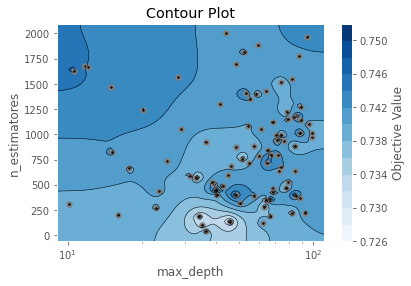

In [55]:
#plt.figure(figsize=(3000, 3000))
optuna.visualization.matplotlib.plot_contour(study, params=["n_estimatores", "max_depth"])

array([<AxesSubplot:xlabel='classifier', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='n_estimatores'>, <AxesSubplot:xlabel='svc_c'>],
      dtype=object)

<Figure size 28800x28800 with 0 Axes>

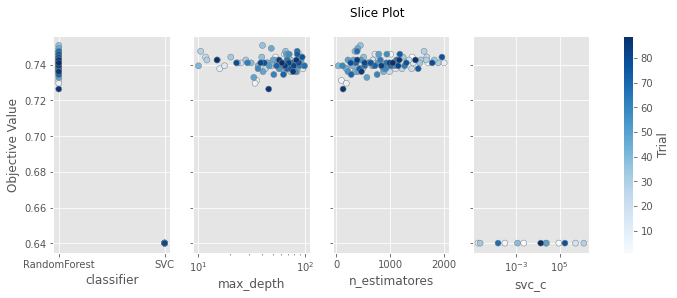

In [47]:
plt.figure(figsize=(400, 400))
optuna.visualization.matplotlib.plot_slice(study)

<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

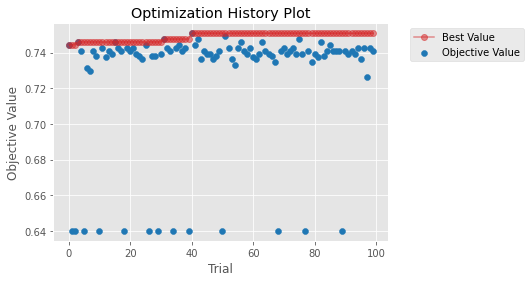

In [56]:
optuna.visualization.matplotlib.plot_optimization_history(study)

In [60]:
#'classifier': 'RandomForest', 'n_estimatores': 450, 'max_depth': 40.15745405428953}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=450, max_depth=40.15745405428953)

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40.15745405428953, n_estimators=450)

In [63]:
y_pred = rf.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94 13]
 [15 32]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154

